In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 

In [2]:
auto_companies = open('auto_companies.txt', 'r')
food_companies = open('food_companies.txt', 'r')
Banks = open('Banks.txt', 'r')
Energy_companies = open('Energy_companies.txt', 'r')



#File Lenght,size Analysis

auto_companies_Lines = auto_companies.readlines()
auto_companies_size = round(os.stat('auto_companies.txt').st_size / 1024**2)

food_companies_Lines = food_companies.readlines()
food_companies_size = round(os.stat('food_companies.txt').st_size / 1024**2)

Banks_Lines = Banks.readlines()
Banks_size = round(os.stat('Banks.txt').st_size / 1024**2)

Energy_companies_Lines = Energy_companies.readlines()
Energy_companies_size = round(os.stat('Energy_companies.txt').st_size / 1024**2)

File_size = {'col1' : [auto_companies_size,food_companies_size, Banks_size, Energy_companies_size]}
File_Lengths = {'col1' : [len(auto_companies_Lines), len(food_companies_Lines), len(Banks_Lines), len(Energy_companies_Lines)]}

File_Lengths = pd.DataFrame(data = File_Lengths)
File_size = pd.DataFrame(data = File_size)


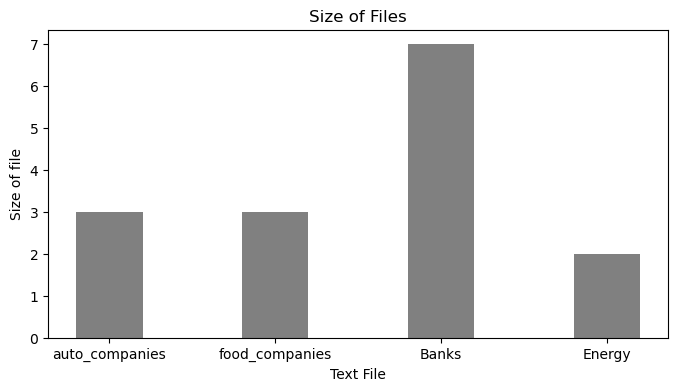

In [3]:
plt.figure(1,figsize=(8,4))
plt.bar(['auto_companies','food_companies','Banks','Energy'], File_size['col1'],color ='gray',width = 0.4)
plt.xlabel("Text File"), 
plt.ylabel("Size of file")
plt.title("Size of Files")

plt.savefig('Size of Files.png', dpi=300, bbox_inches='tight')
plt.show()

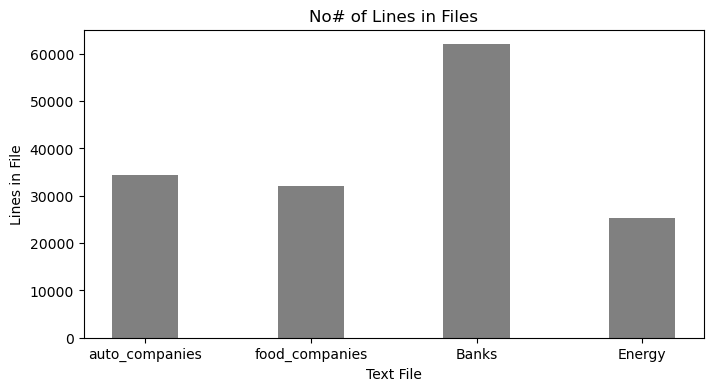

In [4]:

plt.figure(1,figsize=(8,4))
plt.bar(['auto_companies','food_companies','Banks','Energy'], File_Lengths['col1'],color ='gray',width = 0.4)
plt.xlabel("Text File"), 
plt.ylabel("Lines in File")
plt.title("No# of Lines in Files")
plt.savefig('No# of Lines in Files.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
#World count Analysis

def word_count(Lines):
    words = 0
    for i in range(len(Lines)) :
        words = words + len(Lines[i])
    return words

File_words = {'col1' : [word_count(auto_companies_Lines),word_count(food_companies_Lines), word_count(Banks_Lines), word_count(Energy_companies_Lines)]}
File_words = pd.DataFrame(data = File_words)



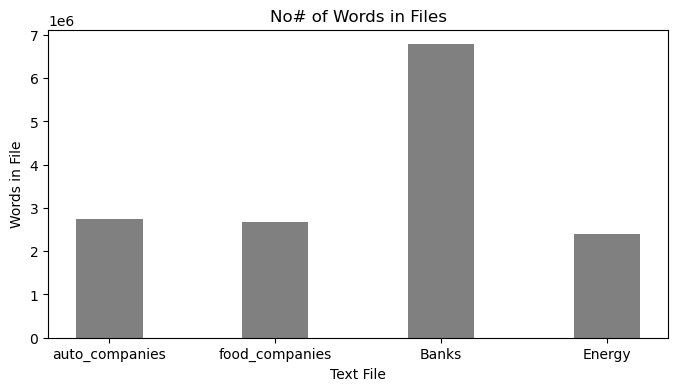

In [6]:
plt.figure(1,figsize=(8,4))
plt.bar(['auto_companies','food_companies','Banks','Energy'], File_words['col1'],color ='gray',width = 0.4)
plt.xlabel("Text File"), 
plt.ylabel("Words in File")
plt.title("No# of Words in Files")
plt.savefig('No# of Words in Files.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
#pip install nltk

In [8]:
# import libraries


import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer




import nltk
#one time 
#nltk.download('all')





File_Lines = {'col1' :[ auto_companies_Lines, food_companies_Lines, Banks_Lines, Energy_companies_Lines]}
File_Lines = pd.DataFrame(data = File_Lines)


In [9]:
#preprocessed text

auto_companies_pr = open('car_companies_10k_pr.txt', 'r')
food_companies_pr = open('food_companies_10k_pr.txt', 'r')
Banks_pr = open('banks_10k_pr.txt', 'r')
Energy_companies_pr = open('energy_companies_10k_pr.txt', 'r')



#File Lenght,size Analysis

auto_companies_pr_Lines = auto_companies_pr.readlines()

food_companies_pr_Lines = food_companies_pr.readlines()

Banks_pr_Lines = Banks_pr.readlines()

Energy_pr_companies_Lines = Energy_companies_pr.readlines()

File_Lines_pr = {'col1' :[ auto_companies_pr_Lines, food_companies_pr_Lines, Banks_pr_Lines, Energy_pr_companies_Lines]}
File_Lines_pr = pd.DataFrame(data = File_Lines_pr)



In [10]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment




# apply get_sentiment function

Sentiment = []

for j in range(4) :
    Sentiment.append(get_sentiment(File_Lines_pr['col1'][j][0]))

Sentiment = pd.DataFrame({'sentiment' : [Sentiment[0],Sentiment[1],Sentiment[2],Sentiment[3]]})

Sentiment



,sentiment
0,1
1,1
2,1
3,1


In [11]:
# N-gram

# NLTK function to generate ngrams
import nltk
from nltk.util import ngrams




In [12]:
from collections import defaultdict

In [13]:
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#nltk.download('stopwords')

# remove non english words

for j in range(4) :
    words = set(nltk.corpus.words.words())
    File_Lines_pr['col1'][j][0] = " ".join(w for w in nltk.wordpunct_tokenize(File_Lines_pr['col1'][j][0]) if w.lower() in words or not w.isalpha())


In [14]:



def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
  #words=[word for word in text.split(" ")]
  #print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans



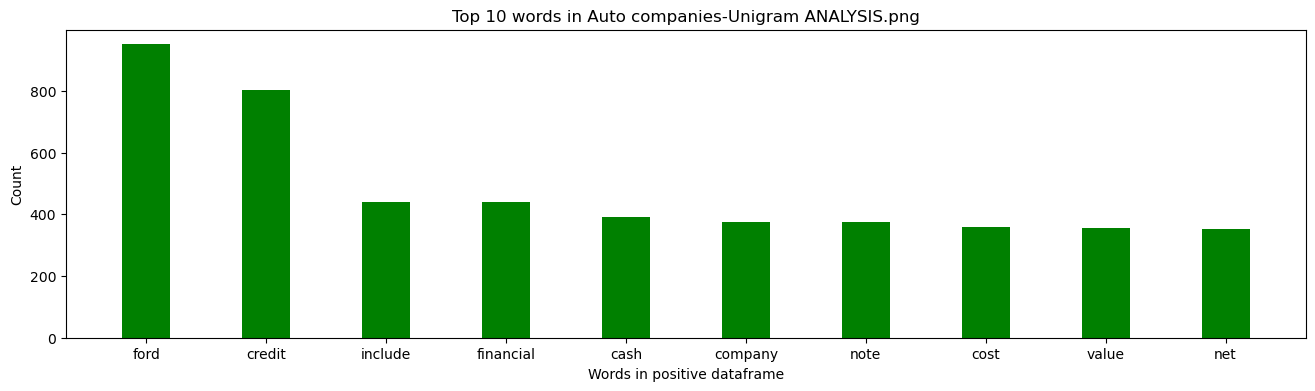

In [15]:

#Auto
positiveValues_Auto= defaultdict(int)

for word in generate_N_grams(File_Lines_pr['col1'][0][0]) :
    positiveValues_Auto[word]+=1
    
df_Auto=pd.DataFrame(sorted(positiveValues_Auto.items(),key=lambda x:x[1],reverse=True))


pd1tri_Auto=df_Auto[0][:10]
pd2tri_Auto=df_Auto[1][:10]


plt.figure(1,figsize=(16,4))
plt.bar(pd1tri_Auto,pd2tri_Auto, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Auto companies-Unigram ANALYSIS.png")
plt.savefig('Top 10 words in Auto companies-Unigram ANALYSIS.png', dpi=300, bbox_inches='tight')
plt.show()

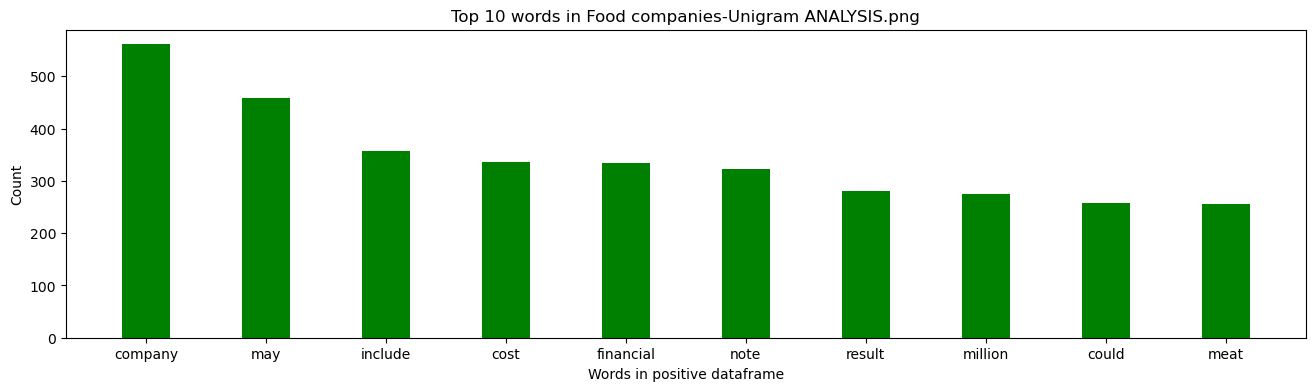

In [16]:

#Food
positiveValues_Food= defaultdict(int)

for word in generate_N_grams(File_Lines_pr['col1'][1][0]) :
    positiveValues_Food[word]+=1
    
df_Food=pd.DataFrame(sorted(positiveValues_Food.items(),key=lambda x:x[1],reverse=True))


pd1tri_Food=df_Food[0][:10]
pd2tri_Food=df_Food[1][:10]


plt.figure(1,figsize=(16,4))
plt.bar(pd1tri_Food,pd2tri_Food, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Food companies-Unigram ANALYSIS.png")
plt.savefig('Top 10 words in Food companies-Unigram ANALYSIS.png', dpi=300, bbox_inches='tight')
plt.show()

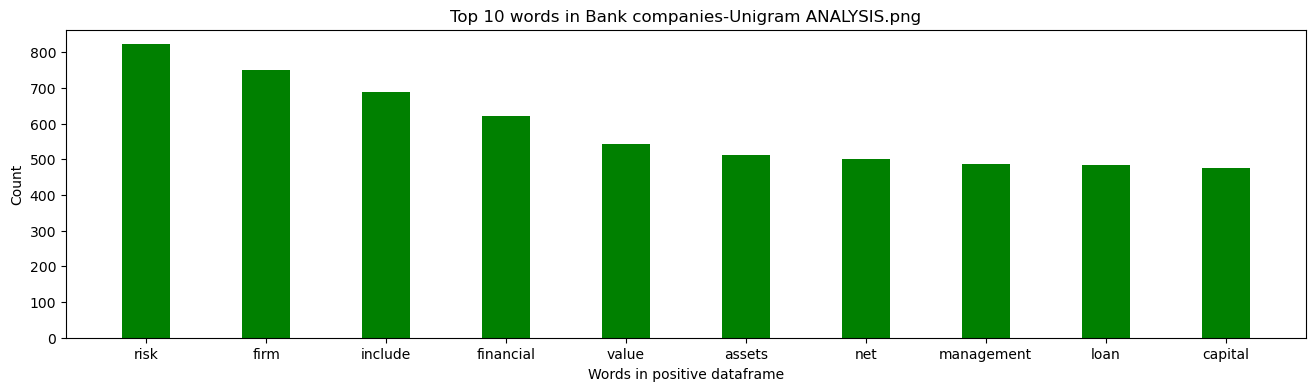

In [17]:

#Banks
positiveValues_Banks= defaultdict(int)

for word in generate_N_grams(File_Lines_pr['col1'][2][0]) :
    positiveValues_Banks[word]+=1
    
df_Banks=pd.DataFrame(sorted(positiveValues_Banks.items(),key=lambda x:x[1],reverse=True))


pd1tri_Banks=df_Banks[0][:10]
pd2tri_Banks=df_Banks[1][:10]


plt.figure(1,figsize=(16,4))
plt.bar(pd1tri_Banks,pd2tri_Banks, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Bank companies-Unigram ANALYSIS.png")
plt.savefig('Top 10 words in Bank companies-Unigram ANALYSIS.png', dpi=300, bbox_inches='tight')
plt.show()

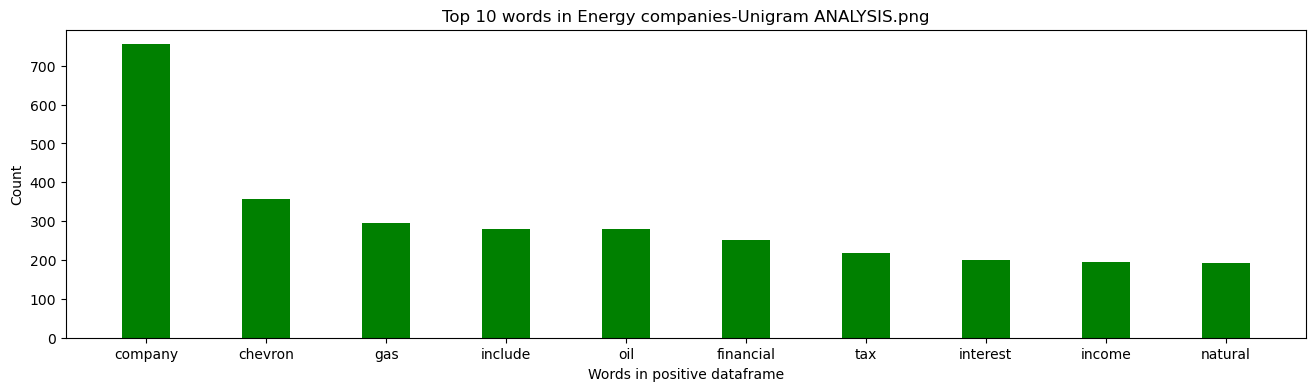

In [18]:
#Energy
positiveValues_Energy= defaultdict(int)

for word in generate_N_grams(File_Lines_pr['col1'][3][0]) :
    positiveValues_Energy[word]+=1
    
df_Energy=pd.DataFrame(sorted(positiveValues_Energy.items(),key=lambda x:x[1],reverse=True))


pd1tri_Energy=df_Energy[0][:10]
pd2tri_Energy=df_Energy[1][:10]


plt.figure(1,figsize=(16,4))
plt.bar(pd1tri_Energy,pd2tri_Energy, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in Energy companies-Unigram ANALYSIS.png")
plt.savefig('Top 10 words in Energy companies-Unigram ANALYSIS.png', dpi=300, bbox_inches='tight')
plt.show()